### <i> Optimizing Energy Consumption Patterns in Southern California An AIDriven Approach to Sustainable Resource Management </i>
### <i> Dataset Link --> https://www.kaggle.com/datasets/datasetengineer/southern-california-energy-consumption </i>
### <i> Import Library Files </i>


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")



### <i> Dataset Overview </i>

In [68]:
df = pd.read_csv("electricity_consumption_optimization_dataset.csv")
df

,Timestamp,Building Type,Energy Consumption (kWh),Temperature (°C),Humidity (%),Occupancy Rate (%),Lighting Consumption (kWh),HVAC Consumption (kWh),Energy Price ($/kWh),Carbon Emission Rate (g CO2/kWh),...,Energy Savings Target (%),Room-Level Energy Consumption (kWh),Zonal Heating/Cooling Data (kWh),Electric Vehicle Charging Status,Building Orientation,IoT Sensor Count,Thermal Comfort Index,Energy Savings Potential (%),Peak Demand Reduction Indicator,Carbon Emission Reduction Category
0,2018-01-01 00:00:00,Residential,74.679912,31.357437,62.472886,49.293544,9.892054,9.073339,0.053297,341.764320,...,16.208574,13.341547,6.719547,0,South,21.425365,80.807871,14.115263,0,Moderate Reduction
1,2018-01-01 01:00:00,Industrial,46.592761,30.229121,63.067770,65.039117,11.063696,26.487881,0.019031,427.270057,...,16.081108,11.750894,7.041203,1,South,34.385339,79.679998,4.107683,0,Moderate Reduction
2,2018-01-01 02:00:00,Commercial,58.836657,19.182581,65.030972,-16.599946,0.582297,10.385565,0.060282,278.064969,...,17.463861,24.297381,12.874189,0,North,67.588352,84.571954,4.130955,0,Moderate Reduction
3,2018-01-01 03:00:00,Residential,53.586516,16.700048,67.405643,27.398152,3.580005,8.199913,0.209318,691.906306,...,14.132527,24.586379,9.526672,0,South,37.714465,95.953736,8.681566,0,No Reduction
4,2018-01-01 04:00:00,Residential,37.800448,29.620051,55.069770,74.220380,17.823608,12.268133,0.225335,620.526286,...,20.960512,24.482306,10.039815,0,North,36.321629,68.227000,19.631869,0,Moderate Reduction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52580,2023-12-31 20:00:00,Residential,78.697373,18.669766,76.145160,86.565125,11.475367,13.489796,0.119900,499.016888,...,18.656061,8.972060,18.585041,0,South,59.425428,70.658451,14.399685,0,Low Reduction
52581,2023-12-31 21:00:00,Residential,59.400463,24.814296,93.473230,51.380712,18.418070,25.319140,0.180057,344.329532,...,27.028035,23.793959,20.340068,0,East,50.490422,89.069748,20.619243,0,Low Reduction
52582,2023-12-31 22:00:00,Residential,65.395535,3.952222,75.281979,49.625698,17.637973,19.546613,0.168849,317.509517,...,22.125447,20.461445,7.762880,0,South,74.773075,70.760759,15.645947,0,Moderate Reduction
52583,2023-12-31 23:00:00,Residential,58.505085,12.342418,54.181047,87.792609,4.205146,-4.032314,0.139890,183.725258,...,11.750403,10.326719,-1.556912,0,South,75.925739,73.370549,11.999294,0,No Reduction


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52585 entries, 0 to 52584
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Timestamp                            52585 non-null  object 
 1   Building Type                        52585 non-null  object 
 2   Energy Consumption (kWh)             52585 non-null  float64
 3   Temperature (°C)                     52585 non-null  float64
 4   Humidity (%)                         52585 non-null  float64
 5   Occupancy Rate (%)                   52585 non-null  float64
 6   Lighting Consumption (kWh)           52585 non-null  float64
 7   HVAC Consumption (kWh)               52585 non-null  float64
 8   Energy Price ($/kWh)                 52585 non-null  float64
 9   Carbon Emission Rate (g CO2/kWh)     52585 non-null  float64
 10  Power Factor                         52585 non-null  float64
 11  Voltage Levels (V)          

In [70]:
df.describe()

,Energy Consumption (kWh),Temperature (°C),Humidity (%),Occupancy Rate (%),Lighting Consumption (kWh),HVAC Consumption (kWh),Energy Price ($/kWh),Carbon Emission Rate (g CO2/kWh),Power Factor,Voltage Levels (V),...,Smart Plug Usage (kWh),Water Usage (liters),Energy Savings Target (%),Room-Level Energy Consumption (kWh),Zonal Heating/Cooling Data (kWh),Electric Vehicle Charging Status,IoT Sensor Count,Thermal Comfort Index,Energy Savings Potential (%),Peak Demand Reduction Indicator
count,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,...,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000,52585.000000
mean,54.035230,21.222907,61.443801,59.607722,11.160347,16.068344,0.156132,429.721926,0.907954,231.213408,...,0.212133,107.971649,16.201512,21.987317,10.773612,0.098450,52.312859,72.435010,11.199564,0.150765
std,20.325416,10.028437,19.898210,31.044187,5.094207,7.011589,0.050107,150.927549,0.100270,10.033883,...,0.100565,50.548085,5.075860,10.051215,5.017799,0.297925,19.952823,15.111665,5.084201,0.357823
min,-28.775697,-20.737576,-21.938353,-59.016988,-8.692871,-11.763507,-0.044520,-196.496633,0.433982,189.182698,...,-0.210465,-103.885674,-5.445251,-18.955447,-9.683825,0.000000,-35.045025,2.910318,-8.615465,0.000000
25%,40.378669,14.508595,47.896731,38.667284,7.715759,11.356539,0.122649,327.388796,0.840439,224.441780,...,0.144081,73.836348,12.773775,15.225246,7.365606,0.000000,38.896109,62.267310,7.766828,0.000000
50%,54.225765,21.165081,61.488839,59.613711,11.160675,16.070362,0.156474,429.280508,0.907893,231.179685,...,0.212577,107.623382,16.194118,21.991886,10.779841,0.000000,52.406424,72.412900,11.156838,0.000000
75%,67.713406,27.984117,74.925621,80.647693,14.595504,20.783193,0.189819,531.833883,0.976403,237.960719,...,0.280462,142.238650,19.624124,28.782171,14.156316,0.000000,65.751941,82.537505,14.607222,0.000000
max,136.499217,63.394893,152.703715,186.104833,33.226991,43.454961,0.365671,1048.783912,1.344342,275.813114,...,0.613246,309.172192,35.849696,66.605084,33.132401,1.000000,133.064853,137.108981,35.361767,1.000000


### <i> Dataset Visulizations And Analysis </i>

                 Timestamp  Energy Consumption (kWh)  Temperature (°C)  \
count                52585              52585.000000      52585.000000   
mean   2020-12-31 12:00:00                 54.035230         21.222907   
min    2018-01-01 00:00:00                -28.775697        -20.737576   
25%    2019-07-02 18:00:00                 40.378669         14.508595   
50%    2020-12-31 12:00:00                 54.225765         21.165081   
75%    2022-07-02 06:00:00                 67.713406         27.984117   
max    2024-01-01 00:00:00                136.499217         63.394893   
std                    NaN                 20.325416         10.028437   

       Humidity (%)  Occupancy Rate (%)  Lighting Consumption (kWh)  \
count  52585.000000        52585.000000                52585.000000   
mean      61.443801           59.607722                   11.160347   
min      -21.938353          -59.016988                   -8.692871   
25%       47.896731           38.667284          

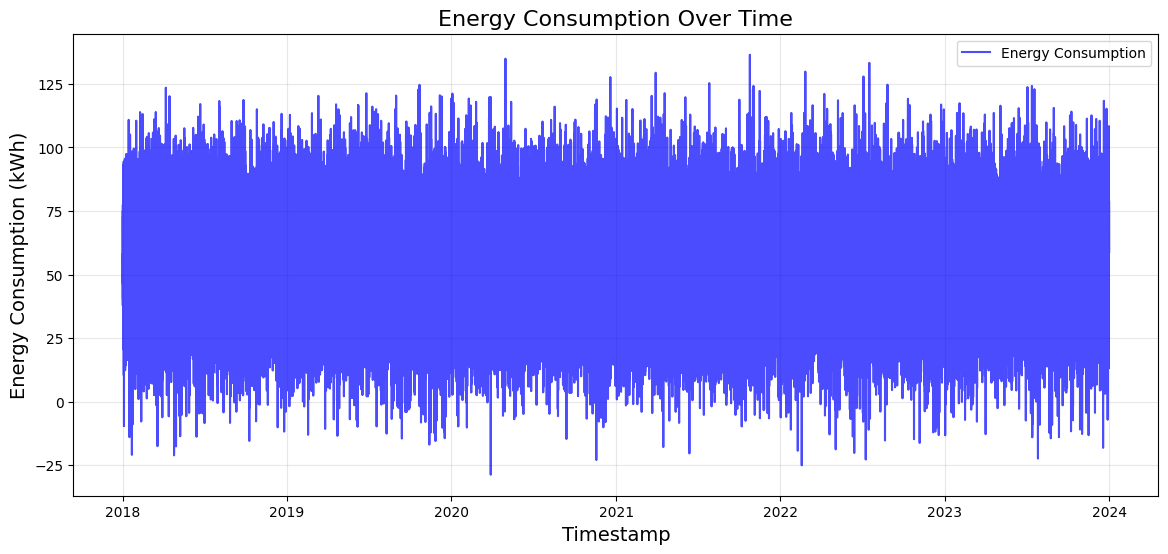

In [71]:
# Step 4: Convert Timestamp to DateTime Format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Step 5: General Information about the Dataset
print(df.describe())
print(df.info())

# Step 6: Visualizations

# 1. **Time Series Visualization: Energy Consumption Over Time**
plt.figure(figsize=(14, 6))
plt.plot(df['Timestamp'], df['Energy Consumption (kWh)'], label='Energy Consumption', color='blue', alpha=0.7)
plt.title('Energy Consumption Over Time', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Energy Consumption (kWh)', fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

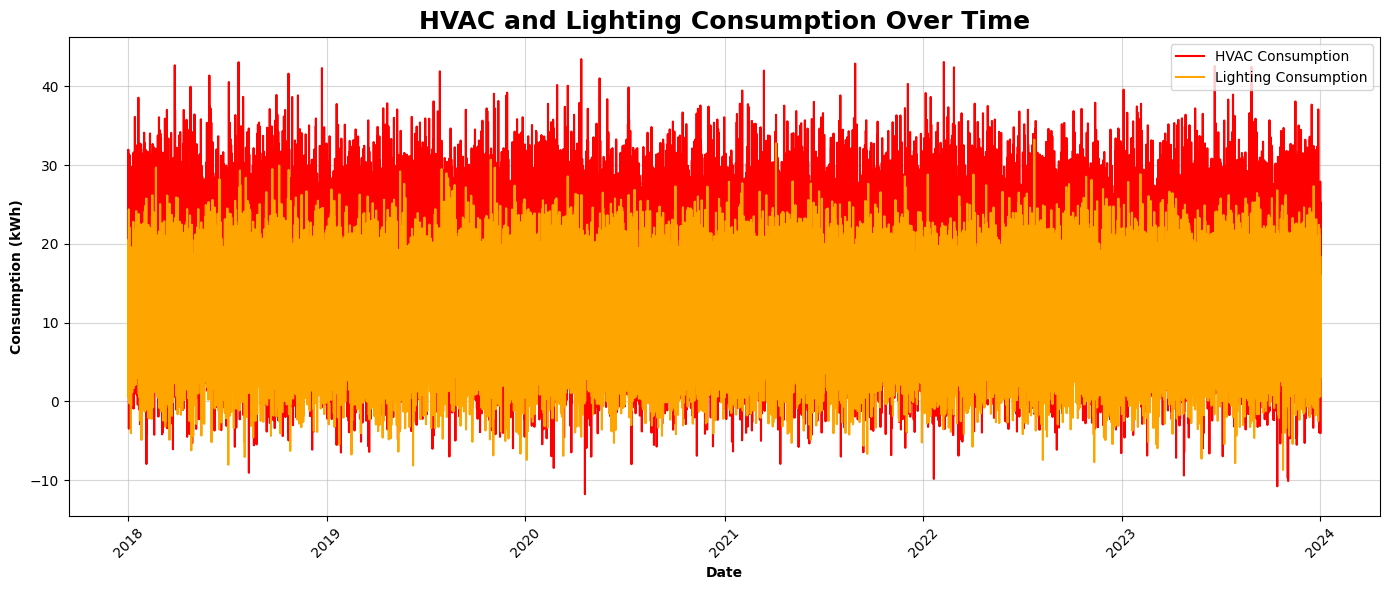

In [72]:
# 8. **HVAC vs. Lighting Over Time**
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Timestamp', y='HVAC Consumption (kWh)', label='HVAC Consumption', color='red', linewidth=1.5)
sns.lineplot(data=df, x='Timestamp', y='Lighting Consumption (kWh)', label='Lighting Consumption', color='orange', linewidth=1.5)
plt.title('HVAC and Lighting Consumption Over Time', fontsize=18, weight='bold')
plt.xlabel('Date', weight='bold')
plt.ylabel('Consumption (kWh)', weight='bold')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("hvac_lighting_over_time.png", dpi=300)
plt.show()

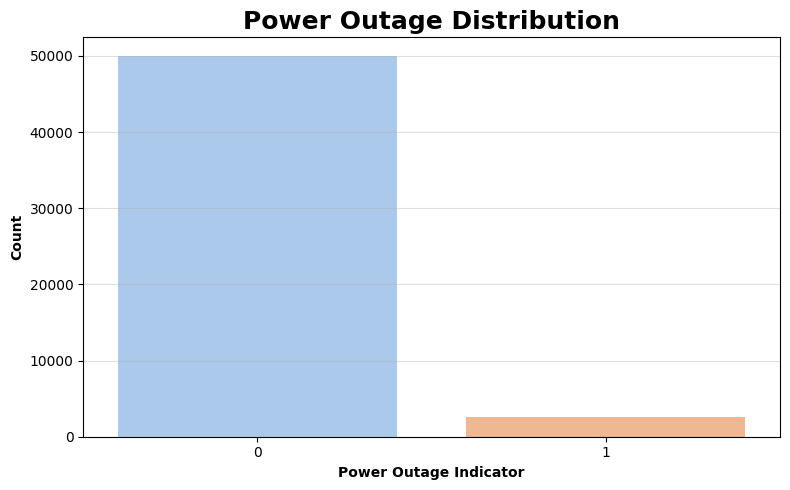

In [73]:
# 11. **Power Outage Distribution**
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Power Outage Indicator', palette='pastel')
plt.title('Power Outage Distribution', fontsize=18, weight='bold')
plt.xlabel('Power Outage Indicator', weight='bold')
plt.ylabel('Count', weight='bold')
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.savefig("power_outage_distribution.png", dpi=300)
plt.show()

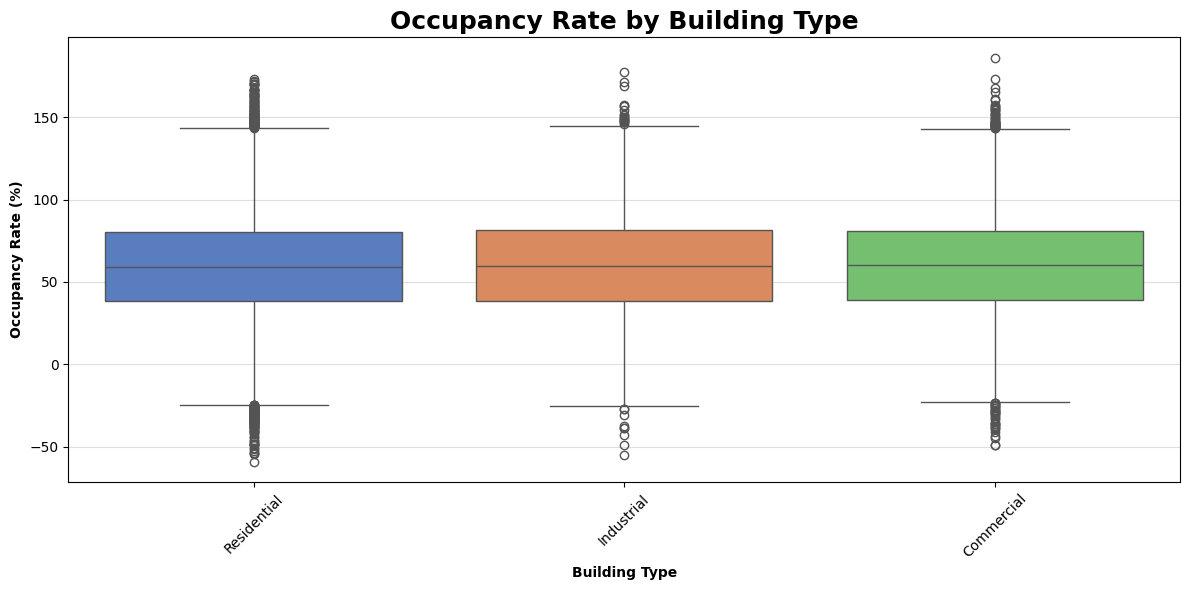

In [74]:
# 10. **Occupancy Rate by Building Type**
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Building Type', y='Occupancy Rate (%)', palette='muted')
plt.title('Occupancy Rate by Building Type', fontsize=18, weight='bold')
plt.xlabel('Building Type', weight='bold')
plt.ylabel('Occupancy Rate (%)', weight='bold')
plt.xticks(rotation=45)
plt.grid(alpha=0.4, axis='y')
plt.tight_layout()
plt.savefig("occupancy_rate_by_building.png", dpi=300)
plt.show()

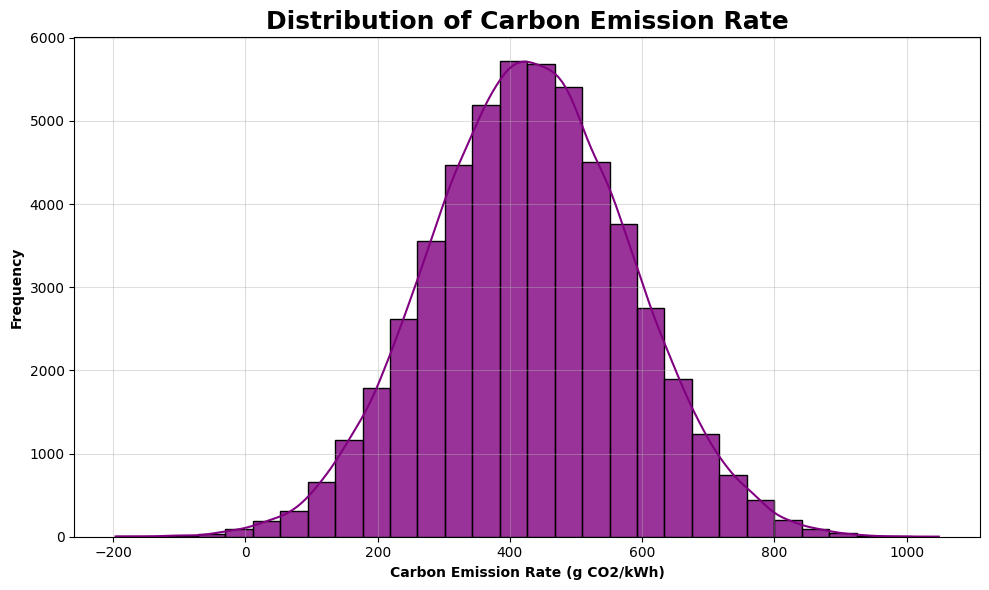

In [75]:
# 9. **Carbon Emission Rate Distribution**
plt.figure(figsize=(10, 6))
sns.histplot(df['Carbon Emission Rate (g CO2/kWh)'], kde=True, bins=30, color='purple', alpha=0.8)
plt.title('Distribution of Carbon Emission Rate', fontsize=18, weight='bold')
plt.xlabel('Carbon Emission Rate (g CO2/kWh)', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.savefig("carbon_emission_distribution.png", dpi=300)
plt.show()


### <i> Data Preprocessing </i>

In [76]:
# Step 4: Handle Missing Values (if any)
df = df.dropna()  # Drop rows with missing values for simplicity

# Step 5: Encode Categorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Step 6: Convert Target into Classification
# Define bins for energy consumption classes
bins = [
    df['Energy Consumption (kWh)'].min(), 
    df['Energy Consumption (kWh)'].quantile(0.33), 
    df['Energy Consumption (kWh)'].quantile(0.66), 
    df['Energy Consumption (kWh)'].max()
]
labels = ['Low', 'Medium', 'High']
df['Energy_Consumption_Class'] = pd.cut(df['Energy Consumption (kWh)'], bins=bins, labels=labels)

# Encode target variable
df['Energy_Consumption_Class'] = le.fit_transform(df['Energy_Consumption_Class'])

# Drop the original regression target column
df = df.drop(columns=['Energy Consumption (kWh)'])

# Step 7: Check and Remove Sparse Classes
# Check class distribution
print("Class distribution before filtering:")
print(df['Energy_Consumption_Class'].value_counts())

# Remove classes with fewer than 2 samples
class_counts = df['Energy_Consumption_Class'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df = df[df['Energy_Consumption_Class'].isin(classes_to_keep)]

# Verify class distribution again
print("Class distribution after filtering:")
print(df['Energy_Consumption_Class'].value_counts())

# Step 8: Feature Selection
X = df.drop(columns=['Energy_Consumption_Class', 'Timestamp'])  # Drop target and timestamp
y = df['Energy_Consumption_Class']

# Step 9: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 10: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Class distribution before filtering:
Energy_Consumption_Class
0    17879
2    17353
1    17352
3        1
Name: count, dtype: int64
Class distribution after filtering:
Energy_Consumption_Class
0    17879
2    17353
1    17352
Name: count, dtype: int64


### <i> Modeling </i>
### <i> Logistic Regression </i>

In [77]:

from sklearn.linear_model import LogisticRegression

# Step 11: Model 1 - Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Results:
[[1789  910  877]
 [1783  856  831]
 [1769  832  870]]
              precision    recall  f1-score   support

           0       0.33      0.50      0.40      3576
           1       0.33      0.25      0.28      3470
           2       0.34      0.25      0.29      3471

    accuracy                           0.33     10517
   macro avg       0.33      0.33      0.32     10517
weighted avg       0.33      0.33      0.32     10517

Accuracy: 0.33422078539507466


### <i> Random Forest </i>

In [78]:
from sklearn.ensemble import RandomForestClassifier
# Step 12: Model 2 - Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Results:
[[1489 1033 1054]
 [1383 1073 1014]
 [1381 1057 1033]]
              precision    recall  f1-score   support

           0       0.35      0.42      0.38      3576
           1       0.34      0.31      0.32      3470
           2       0.33      0.30      0.31      3471

    accuracy                           0.34     10517
   macro avg       0.34      0.34      0.34     10517
weighted avg       0.34      0.34      0.34     10517

Accuracy: 0.34182751735285727


### <i> XGBoost </i>

In [79]:
from xgboost import XGBClassifier

# Step 13: Model 3 - XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Results:
[[1336 1110 1130]
 [1255 1085 1130]
 [1232 1130 1109]]
              precision    recall  f1-score   support

           0       0.35      0.37      0.36      3576
           1       0.33      0.31      0.32      3470
           2       0.33      0.32      0.32      3471

    accuracy                           0.34     10517
   macro avg       0.33      0.34      0.33     10517
weighted avg       0.34      0.34      0.34     10517

Accuracy: 0.3356470476371589


### <i> Comparison Of All Models </i>

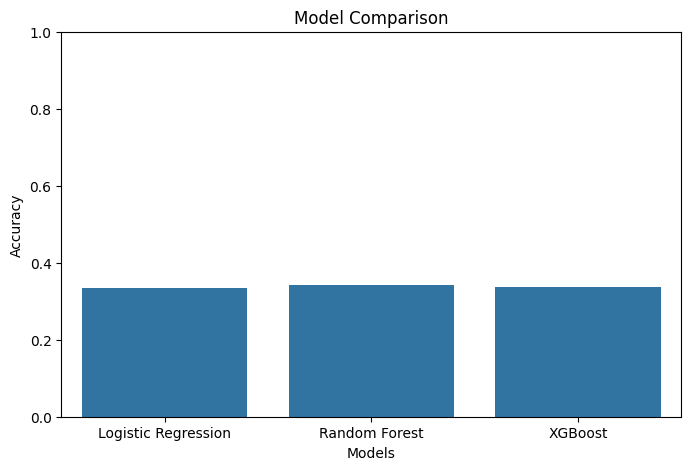

In [80]:
# Step 14: Compare Models
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb)
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()